# Dataset Preparation

In [24]:
# basic_nodes
class plus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None
      
  def forward(self,x,y):
    self._x, self._y = x, y
    self._z = self._x + self._y
    return self._z
  
  def backward(self, dz): # dz = dJ/dz
    return dz*1,dz*1 #dJ/dx= dJ/dz * dz/dx, dJ/dy

class minus_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x - self._y
    return self._z

  def backward(self, dz):
    return 1*dz, -1*dz

class mul_node:
  def __init__(self):
    self._x, self._y = None, None
    self._z = None

  def forward(self, x, y):
    self._x , self._y = x, y
    self._z = self._x * self._y
    return self._z

  def backward(self, dz):
    return dz*self._y, dz*self._x # dJ/dz * dz/dx, dJ/dy

class square_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = self._x * self._x
    return self._z

  def backward(self, dz):
    return dz*(2*self._x)

class mean_node:
  def __init__(self):
    self._x = None
    self._z = None

  def forward(self, x):
    self._x = x
    self._z = np.mean(self._x) # z = 1/n *(x1+x2+...+xn)
    return self._z

  def backward(self, dz):
    dx = dz*1/len(self._x)*np.ones_like(self._x) # dJ/dx1 = dJ/dz * dz/dx1 = dJ/dz * (1/n)
    return dx

In [43]:
class dataset_generator:
  def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
    self._feature_dim = feature_dim
    self._n_sample = n_sample
    self._noise = noise

    self._coefficient = None
    self._init_set_coefficient()

    self._distribution_params = None
    self._init_distribution_params()

  def _init_set_coefficient(self):
    self._coefficient = [1 for _ in range(self._feature_dim)] + [0]  # weights + bias
  
  def _init_distribution_params(self):
    self._distribution_params = {f:{'mean':0, 'std':1} for f in range(1, self._feature_dim)}

  def set_n_sample(self, n_sample):
    self._n_sample = n_sample 

  def set_noise(self, noise):
    self._noise = _noise

  def set_coefficient(self, coefficient_list):
     self._coefficient = coefficient_list

  def set_distribution_params(self, distribution_params):
      for param_key, param_value in distribution_params.items():
        self._distribution_params[param_key] = param_value

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample,
                                            self._feature_dim))
    y_data = np.zeros(shape = (self._n_sample, 1))
    for feature_idx in range(self._feature_dim):
      y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
    y_data += self._coefficient[-1] # bias
    y_data += self._noise*np.random.normal(0,1,size=(self._n_sample, 1))

    return x_data, y_data

  def dataset_visualizer(self):
    if self._feature_dim == 1:
      plt.style.use('seaborn')

      fig, ax = plt.subplots(figsize=(10,10))
      ax.plot(x_data, y_data, 'bo',
              alpha=0.3,
              markersize=20)
      ax.tick_params(axis='both',
                     labelsize=30)
      ax.set_title("Dataset", fontsize=40, color='darkred')
      ax.set_xlabel('X data', fontsize=30, alpha=0.6)
      ax.set_ylabel('Y data', fontsize=30, alpha=0.6)

    else:
      class feature_dim_error(Exception):
        pass
      raise feature_dim_error("Visualization is valid for only feature_dim == 1")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

In [4]:
### Parameter Setting
t_th1, t_th0 = 5, 5 # target theta
th1, th0 = 1, 1
lr = 0.01
epochs = 20
batch_size = 8

In [5]:
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([t_th1,t_th0]) # y=5x+5
x_data, y_data = dataset_gen.make_dataset() # (100, 1) (100, 1)
data = np.hstack((x_data, y_data)) # (100, 2)
n_batch = int(data.shape[0]/batch_size)

# Model/Cost Implementation

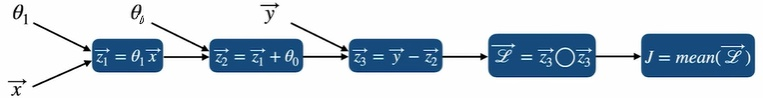

In [6]:
# model implementation
node1 = mul_node()
node2 = plus_node()

# square loss implementation
node3 = minus_node()
node4 = square_node()
node5 = mean_node()

# Learning

In [8]:
th1_list, th0_list = [], []
cost_list = []

for epoch in range(epochs):
  np.random.shuffle(data) # inplace operation (row random shuffling)

  for batch_idx in range(n_batch):
    batch = data[batch_idx*batch_size : (batch_idx+1)*batch_size]

    # forward propagation
    Z1 = node1.forward(th1, batch[:,0])
    Z2 = node2.forward(Z1, th0)
    Z3 = node3.forward(batch[:,1],Z2)
    L = node4.forward(Z3)
    J = node5.forward(L)

    # backpropagation
    dL = node5.backward(1)
    dZ3 = node4.backward(dL)
    dY,dZ2 = node3.backward(dZ3)
    dZ1, dTh0 = node2.backward(dZ2)
    dTh1, dX = node1.backward(dZ1)

    # update
    th1_list.append(th1)
    th0_list.append(th0)
    cost_list.append(J)

    th1 = th1 - lr*np.sum(dTh1)
    th0 = th0 - lr*np.sum(dTh0)

# Result Visualization

Text(0.5, 1.0, '$\\theta_{1}, \\theta_{0}$')

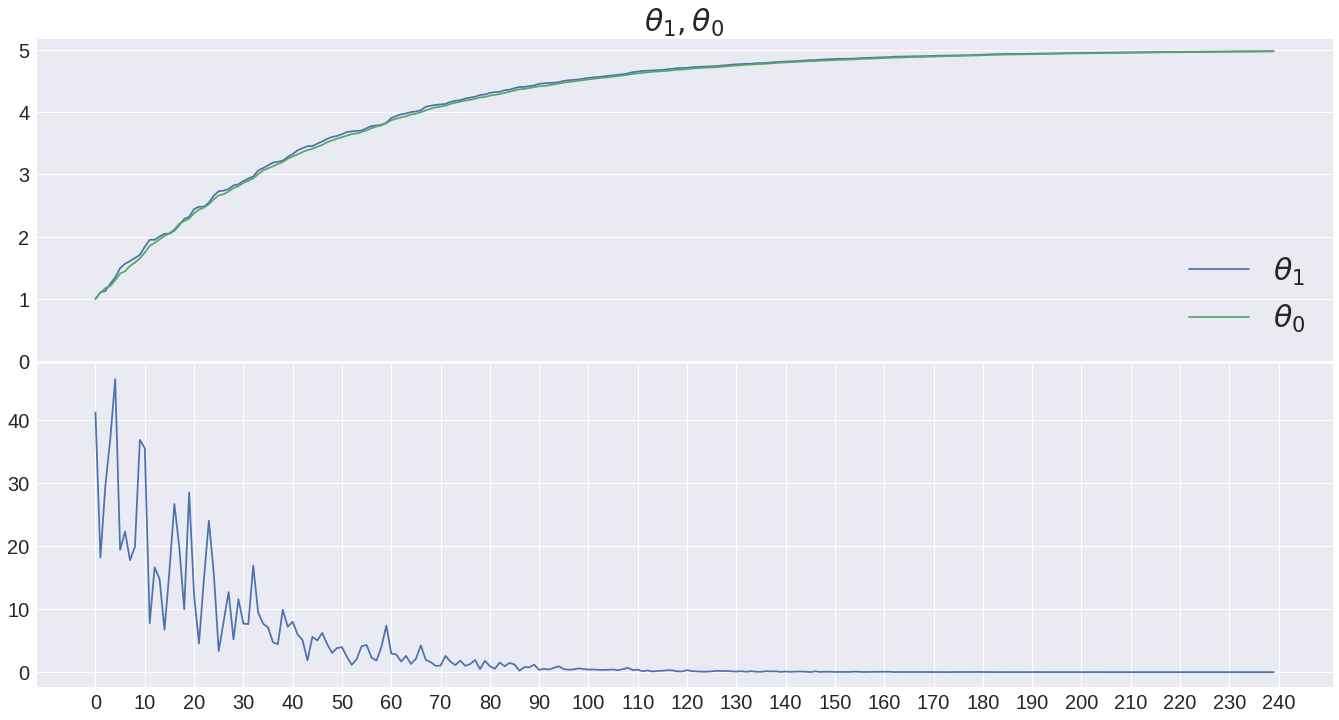

In [9]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[1].plot(cost_list)

fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95,
                    hspace=0.01)
ax[0].legend(loc='lower right', fontsize=30)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)

x_ticks = np.arange(0, len(th1_list)+1, 10)
y_ticks = np.arange(0,6)
ax[1].set_xticks(x_ticks)
ax[0].set_yticks(y_ticks)

ax[0].set_title(r'$\theta_{1}, \theta_{0}$', fontsize=30)

------------------------------------------------------------------------

# SVLR Class - initial setting

In [29]:
class SVLR:
  def __init__(self, th1, th0):
    self.th1, self.th0 = th1,th0
    
    self.th1_list, self.th0_list = [], []
    self.cost_list = []

    self.iter_cnt, self.check_cnt = 0, 0

    self.model_imp()
    self.cost_imp()

  def model_imp(self):
    self.node1 = mul_node()
    self.node2 = plus_node()

  def cost_imp(self):
    self.node3 = minus_node()
    self.node4 = square_node()
    self.node5 = mean_node()

  def forward(self, mini_batch):
    Z1 = self.node1.forward(self.th1, mini_batch[:,0])
    Z2 = self.node2.forward(Z1, self.th0)
    Z3 = self.node3.forward(mini_batch[:,1], Z2)
    L = self.node4.forward(Z3)
    J = self.node5.forward(L)

    if self.iter_cnt % check_freq == 0:
      self.cost_list.append(J)

  def backward(self, lr):
    if self.iter_cnt % check_freq == 0:
      self.th1_list.append(self.th1)
      self.th0_list.append(self.th0)
      self.check_cnt += 1

    dL = self.node5.backward(1)
    dZ3 = self.node4.backward(dL)
    dY, dZ2 = self.node3.backward(dZ3)
    dZ1, dTh0 = self.node2.backward(dZ2)
    dTh1, dX = self.node1.backward(dZ1)

    self.th1 = self.th1 - lr*np.sum(dTh1)
    self.th0 = self.th0 - lr*np.sum(dTh0)

    self.iter_cnt += 1

  def result_visualization(self):
    fig, ax = plt.subplots(2,1, figsize=(30,15))
    ax[0].plot(self.th1_list, label=r'$\theta_{1}$')
    ax[0].plot(self.th0_list, label=r'$\theta_{0}$')
    ax[1].plot(self.cost_list)

    fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.03)
    ax[0].legend(loc='lower right', fontsize=20)
    
    ax[0].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_xaxis().set_visible(False)

    x_ticks = np.linspace(0, self.check_cnt, 10).astype(int)
    x_ticklabels = x_ticks*check_freq
    y_ticks = np.arange(0, t_th0 + 0.5)

    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_ticklabels)
    ax[0].set_yticks(y_ticks)

    ax[0].tick_params(axis= 'both', labelsize=30)
    ax[1].tick_params(axis= 'both', labelsize=30)

# Mini-batch Generator

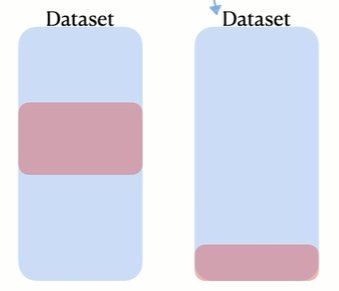

In [21]:
def get_data_batch(data, batch_idx):
  if batch_idx is n_batch - 1: # 짜투리를 이용(마지막 iteration)
    batch = data[batch_idx*batch_size:]
  else:
    batch = data[batch_idx*batch_size : (batch_idx+1)*batch_size]
  return batch

# Basic Settings

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

### Parameter Setting
t_th1, t_th0 = 5, 5 # target theta
th1, th0 = 1, 1

# data params setting
distribution_params = {'feature_0' : {'mean':0, 'std':1}}

# learning params setting
lr = 0.01
epochs = 10
batch_size = 4
check_freq = 3

### Dataset Preparation
dataset_gen = dataset_generator()

dataset_gen.set_coefficient([t_th1, t_th0])
dataset_gen.set_distribution_params(distribution_params)
x_data, y_data = dataset_gen.make_dataset()
data = np.hstack((x_data, y_data))
n_batch = np.ceil(data.shape[0]/batch_size).astype(int)        

# Learning

In [46]:
# Learning
model = SVLR(th1, th0)

for epoch in range(epochs):
  np.random.shuffle(data)

  for batch_idx in range(n_batch):
    batch = get_data_batch(data, batch_idx)

    model.forward(batch)
    model.backward(lr)

# Visualization

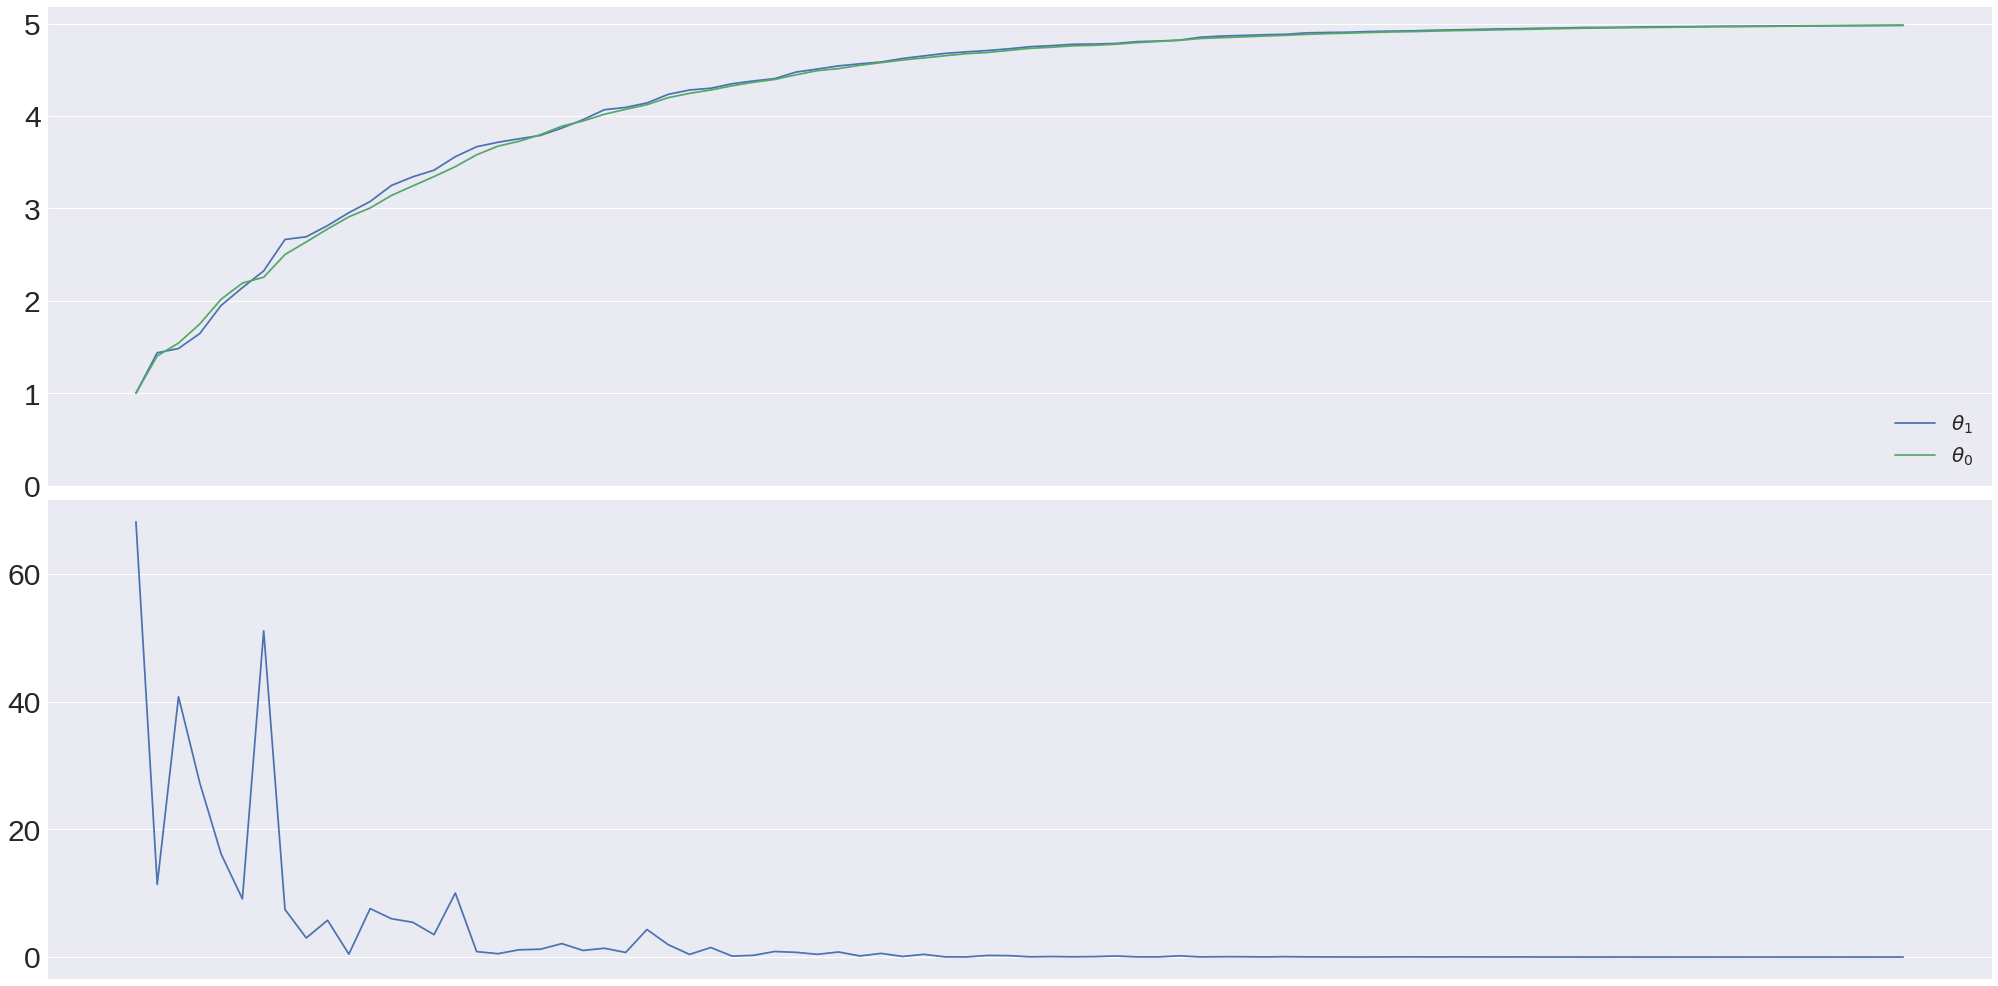

In [47]:
model.result_visualization()